Populating the interactive namespace from numpy and matplotlib


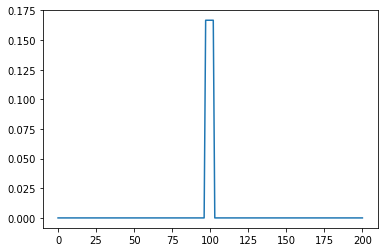

In [8]:
## Ejercico 1
%pylab inline
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division

########### Parámetros Iniciales ###########
Fs = 10000   # Sampling Freq 10KHz
N = 201      # Samples number
t = np.linspace(0,N/Fs,num=N) # Crea una variable de tiempo desde 0, con intervalos de 1/Fs

zeros = np.zeros(100)
ones = np.ones(1)
dirac = np.concatenate((zeros,ones,zeros),axis=0)

MVSIZE = 3

avg = np.zeros(N)
for n in range(len(dirac)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(dirac))):
            suma = suma + dirac[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
plt.plot(avg)


#A fin de de obtener la transferencia del moving average, se ataca la funcion con un delta de Dirac, obtenida mediante concatendo de array
#como resultado se obtuvo un pulso y a medida de modificar MVSIZE, tamaño de la ventana que toma el moving average
#varia su ancho y amplitud  constante la energia pero variando su distribucion.

Populating the interactive namespace from numpy and matplotlib


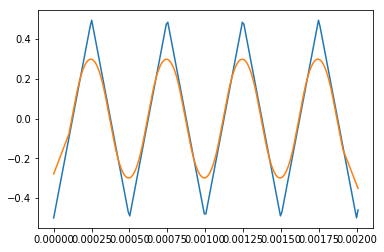

In [26]:
##Ejercicio 2
%pylab inline
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division
Fs = 100000   # Sampling Freq 10KHz
N = 201      # Samples number
t = np.linspace(0,N/Fs,num=N) # Crea una variable de tiempo desde 0, con intervalos de 1/Fs

F1=1000
F2=2000

cuadrada=0.5*sig.square( 2*np.pi * F1 * t)
triangular=0.5*sig.sawtooth( 2*np.pi * F2 * t,0.5)
plt.plot(t, triangular)
MVSIZE = 10

def moving_avg (signal, MVSIZE):
    avg=np.zeros(len(signal))
    for n in range(len(avg)):
        acu = 0
        d = 0
        for k in range (-(MVSIZE), MVSIZE):
            if ((n-k) > 0) and ((n-k) < (len(signal))):
                acu = acu + signal[(n-k)]
                d = d+1
        avg[n]=acu/d
    return avg
cuadrada_filtrada=moving_avg(cuadrada,MVSIZE)
triangular_filtrada=moving_avg(triangular,MVSIZE)
plt.plot(t,triangular_filtrada)

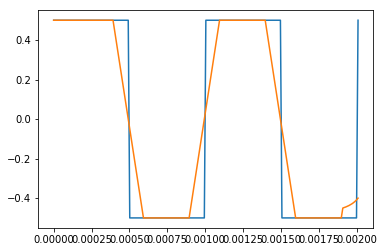

In [27]:
plt.plot(t, cuadrada)
plt.plot(t,cuadrada_filtrada)


Superponiendo la señal original con la resultante podemos ver como se redondea el pico de la triangular y a un mayor 
MVSIZE la señal asemeja a una senoidal en la cuadrada se observa la deformación de los flacos asemejando a rampas,
en ambas señales se obsevo una atenuación de la amplitud


In [9]:
%pylab inline
import timeit
import time
import numpy as np
v2=np.array([2,2.3,2])
v1=np.array([0.5,3,8,9,10])
print(np.convolve(v1,v2))
def convolusion(v1,v2):
    v1=v1[::-1] #invierto v1; va a recorrer el s2
    s=np.zeros(len(v1)+len(v2)-1)#genero el vector convolusion
    s2=np.zeros(len(v1)-1)
    s2=np.append(s2,v2)#genero s2; el vector que sera recorrido por v1 invertido
    k=0
    while len(s2[(k+1):len(v1)+k+1])>=len(v1):#mientras pueda entrar v1 completo en el tramo de v2 
        aux=np.dot(s2[k:(len(v1)+k)],v1)#puedo realizar el producto punto con el vector completo
        s[k]=aux
        k=k+1
    for j in range(k,len(s)):#todavia queda un tramo de v2 pero es menor a v1
        aux=np.dot(s2[j:len(s)],v1[0:(len(v1)+k-j)])#reduzco el vector para hacer el producto punto hasta llenar s
        s[j]=aux
    return s
def convolusion_int(v1,v2):
    v1=v1[::-1].astype(int) #invierto v1; va a recorrer el s2
    s=np.zeros(len(v1)+len(v2)-1).astype(int)#genero el vector convolusion
    s2=np.zeros(len(v1)-1)
    s2=np.append(s2,v2).astype(int)#genero s2; el vector que sera recorrido por v1 invertido     
    k=0
    while len(s2[(k+1):len(v1)+k+1])>=len(v1):#mientras pueda entrar v1 completo en el tramo de v2 
        aux=np.dot(s2[k:(len(v1)+k)],v1).astype(int)#puedo realizar el producto punto con el vector completo
        s[k]=aux
        k=k+1
    for j in range(k,len(s)):#todavia queda un tramo de v2 pero es menor a v1
        aux=np.dot(s2[j:len(s)],v1[0:(len(v1)+k-j)]).astype(int)#reduzco el vector para hacer el producto punto hasta llenar s
        s[j]=aux.astype(int)
    return s
print(convolusion(v1,v2))
print(convolusion_int(v1,v2))
start = time.time()
conv_ = np.convolve(v1,v2)
end = time.time()
print (end-start)
start = time.time()
conv_float = convolusion(v1,v2)
end = time.time()
print (end-start)
start = time.time()
conv_int = convolusion_int(v1,v2)
end = time.time()
print (end-start)

Populating the interactive namespace from numpy and matplotlib
[  1.     7.15  23.9   42.4   56.7   41.    20.  ]
[  1.     7.15  23.9   42.4   56.7   41.    20.  ]
[ 0  6 22 40 54 38 20]
0.00045108795166
0.00118803977966
0.000519037246704


al observar los tiempos se ve como siempre la funcion nativa es senciblemente mas rápida que las que podamos fabricar 
mientras que al forzar que trabaje en entero reducimos el tiempo casi a la mitad que trabajando en punto flotante y si los componentes de los vectores son enteros no se incurre en error.
Al utilizar componentes .float en el vector se observa errores en alguno de los componentes del vector convolusion, este error debe ser ponderado junto con el ahorro de tiempo.
